In [1]:
# Step 1: Import the required modules and get pwd

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# Get the data

In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query= '''SELECT f.title AS 'film_title', f.rental_rate, f.rental_duration, f.rating, f.special_features, i.store_id, c.name AS 'category'
FROM sakila.film f
JOIN sakila.inventory i ON f.film_id = i.film_id 
JOIN sakila.rental r ON r.inventory_id = i.inventory_id
JOIN sakila.film_category fc ON fc.film_id = f.film_id 
JOIN sakila.category c ON c.category_id = fc.category_id 
ORDER BY f.title;'''

sakila_data = pd.read_sql_query(query, engine)
sakila_data.head()

,film_title,rental_rate,rental_duration,rating,special_features,store_id,category
0,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",2,Documentary
1,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary
2,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary
3,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary
4,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary


In [4]:
sakila_data.shape

(16044, 7)

In [5]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query= '''SELECT f.title AS 'film_title', COUNT(r.rental_date) AS rented
FROM sakila.film f
JOIN sakila.inventory i USING(film_id)
JOIN sakila.rental r USING(inventory_id)
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
WHERE r.rental_date LIKE '%%2005-08%%'
GROUP BY f.title
ORDER BY f.title;'''

sakila_rented = pd.read_sql_query(query, engine)
sakila_rented.head()

,film_title,rented
0,ACADEMY DINOSAUR,9
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,6
3,AFFAIR PREJUDICE,6
4,AFRICAN EGG,3


In [6]:
sakila_data.columns

Index(['film_title', 'rental_rate', 'rental_duration', 'rating',
       'special_features', 'store_id', 'category'],
      dtype='object')

In [7]:
sakila_rented.columns

Index(['film_title', 'rented'], dtype='object')

In [8]:
sakila_all_films = pd.merge(sakila_data, sakila_rented)
sakila_all_films.columns

Index(['film_title', 'rental_rate', 'rental_duration', 'rating',
       'special_features', 'store_id', 'category', 'rented'],
      dtype='object')

In [9]:
sakila_all_films['rented'] = sakila_all_films['rented'].astype('bool')

In [10]:
sakila_all_films

,film_title,rental_rate,rental_duration,rating,special_features,store_id,category,rented
0,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",2,Documentary,True
1,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
2,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
3,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
4,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
...,...,...,...,...,...,...,...,...
16039,ZORRO ARK,4.99,3,NC-17,"Trailers,Commentaries,Behind the Scenes",1,Comedy,True
16040,ZORRO ARK,4.99,3,NC-17,"Trailers,Commentaries,Behind the Scenes",1,Comedy,True
16041,ZORRO ARK,4.99,3,NC-17,"Trailers,Commentaries,Behind the Scenes",1,Comedy,True
16042,ZORRO ARK,4.99,3,NC-17,"Trailers,Commentaries,Behind the Scenes",1,Comedy,True


In [11]:
sakila_all_films['rented'].value_counts(dropna=False)

True    16044
Name: rented, dtype: int64

In [12]:
sakila_all_films.dtypes

film_title           object
rental_rate         float64
rental_duration       int64
rating               object
special_features     object
store_id              int64
category             object
rented                 bool
dtype: object

In [13]:
#sakila_all_films = sakila_all_films.drop(['title'], axis =1)
#sakila_all_films = sakila_all_films.drop(['language_id'], axis =1)

In [14]:
sakila_all_films.head()

,film_title,rental_rate,rental_duration,rating,special_features,store_id,category,rented
0,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",2,Documentary,True
1,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
2,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
3,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True
4,ACADEMY DINOSAUR,0.99,6,PG,"Deleted Scenes,Behind the Scenes",1,Documentary,True


In [15]:
sakila_all_films.isna().sum()

film_title          0
rental_rate         0
rental_duration     0
rating              0
special_features    0
store_id            0
category            0
rented              0
dtype: int64

In [16]:
sakila_all_films['rating'] = sakila_all_films['rating'].astype('object')

In [17]:
sakila_all_films['special_features'] = sakila_all_films['special_features'].astype('object')

In [18]:
sakila_all_films.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_rate,16044.0,2.942630,1.649678,0.99,0.99,2.99,4.99,4.99
rental_duration,16044.0,4.935490,1.401690,3.00,4.00,5.00,6.00,7.00
store_id,16044.0,1.506171,0.499978,1.00,1.00,2.00,2.00,2.00


In [19]:
sakila_all_films['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0           PG
1           PG
2           PG
3           PG
4           PG
         ...  
16039    NC-17
16040    NC-17
16041    NC-17
16042    NC-17
16043    NC-17
Name: rating, Length: 16044, dtype: object>

In [20]:
sakila_all_films['special_features'].value_counts

<bound method IndexOpsMixin.value_counts of 0               Deleted Scenes,Behind the Scenes
1               Deleted Scenes,Behind the Scenes
2               Deleted Scenes,Behind the Scenes
3               Deleted Scenes,Behind the Scenes
4               Deleted Scenes,Behind the Scenes
                          ...                   
16039    Trailers,Commentaries,Behind the Scenes
16040    Trailers,Commentaries,Behind the Scenes
16041    Trailers,Commentaries,Behind the Scenes
16042    Trailers,Commentaries,Behind the Scenes
16043    Trailers,Commentaries,Behind the Scenes
Name: special_features, Length: 16044, dtype: object>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

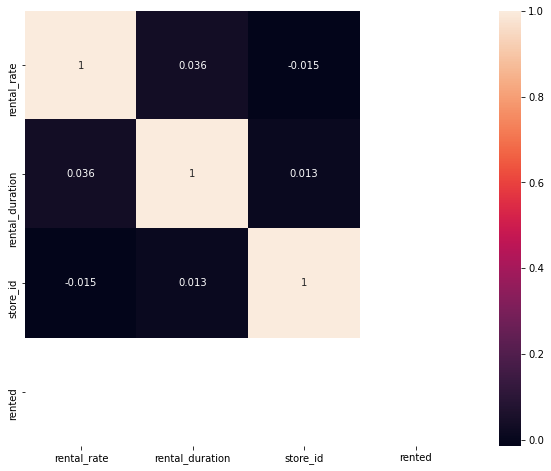

In [22]:
corr_matrix=sakila_all_films.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [23]:
#Train-test-split 
y = sakila_all_films['rented']
X = sakila_all_films.drop('rented', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
X_train.shape

(9626, 7)

In [32]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [33]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_rate,rental_duration,store_id
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.5,1.0,0.0
3,0.0,0.5,1.0
4,0.0,0.0,1.0


In [36]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['rating', 'special_features'],
                             drop_first=True)
X_train_cat.head()

<ipython-input-36-24a8abfe61e5>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_categorical = X_train.select_dtypes(include = np.object)


,film_title,category,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
14014,SWEETHEARTS SUSPECTS,Children,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6908,HONEY TIES,Sports,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7637,ISLAND EXORCIST,Classics,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
826,BANGER PINOCCHIO,Music,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10450,PACKER MADIGAN,Animation,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


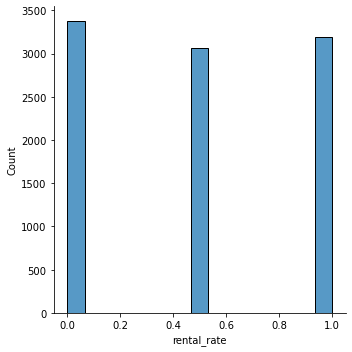

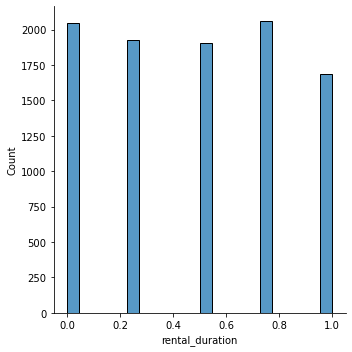

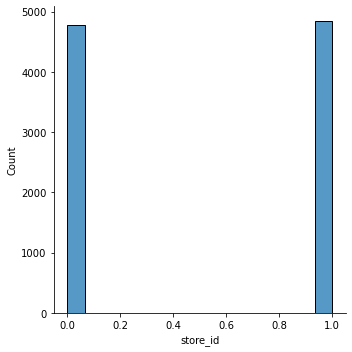

In [38]:
# Explore visually the transformed numerical columns
sns.displot(X_train_norm['rental_rate'])
plt.show()

sns.displot(X_train_norm['rental_duration'])
plt.show()

sns.displot(X_train_norm['store_id'])
plt.show()


In [47]:
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [50]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

ValueError: could not convert string to float: 'SWEETHEARTS SUSPECTS'

In [ ]:
#perform transformations on the X_test as well

In [42]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [43]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['rating', 'special_features'],
                            drop_first=True)

display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))


X_test_cat.head()

<ipython-input-43-31c80ef68202>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_categorical = X_test.select_dtypes(include = np.object)


[('film_title', 'film_title'),
 ('category', 'category'),
 ('rating_NC-17', 'rating_NC-17'),
 ('rating_PG', 'rating_PG'),
 ('rating_PG-13', 'rating_PG-13'),
 ('rating_R', 'rating_R'),
 ('special_features_Commentaries', 'special_features_Commentaries'),
 ('special_features_Commentaries,Behind the Scenes',
  'special_features_Commentaries,Behind the Scenes'),
 ('special_features_Commentaries,Deleted Scenes',
  'special_features_Commentaries,Deleted Scenes'),
 ('special_features_Commentaries,Deleted Scenes,Behind the Scenes',
  'special_features_Commentaries,Deleted Scenes,Behind the Scenes'),
 ('special_features_Deleted Scenes', 'special_features_Deleted Scenes'),
 ('special_features_Deleted Scenes,Behind the Scenes',
  'special_features_Deleted Scenes,Behind the Scenes'),
 ('special_features_Trailers', 'special_features_Trailers'),
 ('special_features_Trailers,Behind the Scenes',
  'special_features_Trailers,Behind the Scenes'),
 ('special_features_Trailers,Commentaries',
  'special_fea

,film_title,category,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,"special_features_Commentaries,Behind the Scenes","special_features_Commentaries,Deleted Scenes","special_features_Commentaries,Deleted Scenes,Behind the Scenes",special_features_Deleted Scenes,"special_features_Deleted Scenes,Behind the Scenes",special_features_Trailers,"special_features_Trailers,Behind the Scenes","special_features_Trailers,Commentaries","special_features_Trailers,Commentaries,Behind the Scenes","special_features_Trailers,Commentaries,Deleted Scenes","special_features_Trailers,Commentaries,Deleted Scenes,Behind the Scenes","special_features_Trailers,Deleted Scenes","special_features_Trailers,Deleted Scenes,Behind the Scenes"
8248,LEATHERNECKS DWARFS,Travel,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4045,DRUMLINE CYCLONE,Travel,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4147,DYNAMITE TARZAN,Classics,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11927,ROUGE SQUAD,Games,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7625,ISLAND EXORCIST,Classics,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [44]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [45]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

NameError: name 'classification' is not defined

In [ ]:
#Check on imbalances
print(y_test.value_counts())

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

In [ ]:
confusion_matrix(y_test, predictions_clf)

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
pd.Series(predictions_clf).value_counts()